Null values in the dataset:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


C:\Users\Will Hutcheon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

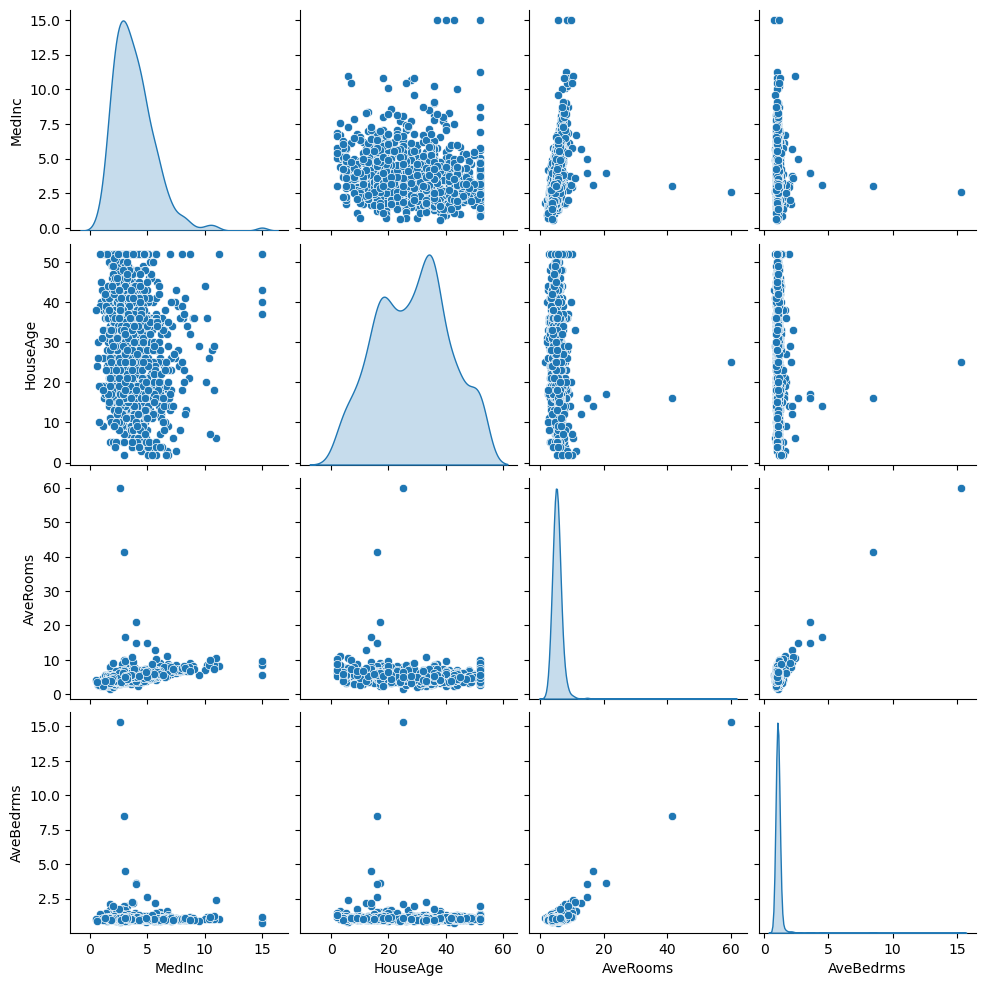

Mean Squared Error (MSE) scores:
[0.53860597 0.5258672  0.48618359 0.53783427 0.50814408]
Mean MSE: 0.5193270208432292
Standard Deviation of MSE: 0.019902335658033662


In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch the data
data = fetch_california_housing()
X = data.data
y = data.target
feature_names = data.feature_names

# Convert to DataFrame for EDA
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y

# Check for null values
print("Null values in the dataset:")
print(df.isnull().sum())

# Visualize some features
plt.figure(figsize=(12, 8))
sns.pairplot(df.sample(1000), vars=feature_names[:4], diag_kind='kde')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold cross-validation and calculate scores
scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Print the mean and standard deviation of the MSE scores
print("Mean Squared Error (MSE) scores:")
print(-scores)
print("Mean MSE:", -scores.mean())
print("Standard Deviation of MSE:", scores.std())


In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Fetch the data
data = fetch_california_housing()
X = data.data
y = data.target

# Initialize a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

# Define the KFold cross-validation splitter
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate mean squared error (MSE) scores
mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Print the mean and standard deviation of the MSE scores
print("Mean Squared Error (MSE) scores:")
print(-mse_scores)  # Negative scores
print("Mean MSE:", -mse_scores.mean())  # Negative mean
print("Standard Deviation of MSE:", mse_scores.std())  # No change in standard deviation


Mean Squared Error (MSE) scores:
[0.46395652 0.46219215 0.43122864 0.42488448 0.4686768 ]
Mean MSE: 0.45018771859450996
Standard Deviation of MSE: 0.018304277676222187


Using random forest rather than linear regression did not improve the model for this dataset